In [2]:
import sys

sys.path.append("..")

import jax
import jax.numpy as jnp
from input_pipeline import dataloader
from qm9 import load_qm9

In [5]:
molecules = load_qm9("qm9_data")[:2]
atomic_numbers = jnp.array([1, 6, 7, 8, 9])
epsilon = 0.1  # Angstroms
cutoff = 5.0  # Angstroms

loader = dataloader(jax.random.PRNGKey(0), molecules, atomic_numbers, epsilon, cutoff, 10, 20, 10)


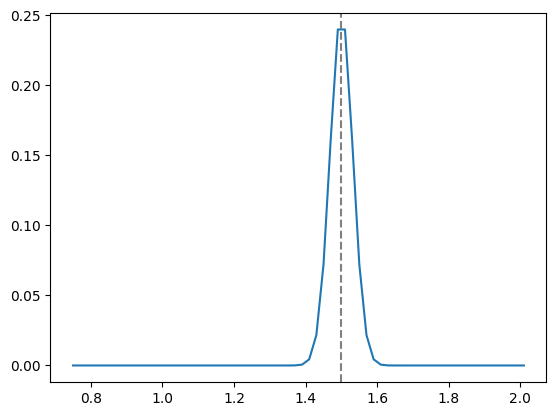

In [31]:
RADII = jnp.arange(0.75, 2.03, 0.02)
target_position = 1.5
radius_rbf_variance = 1e-3
radius_weights = jax.vmap(
        lambda radius: jnp.exp(
            -((radius - jnp.linalg.norm(target_position)) ** 2)
            / (2 * radius_rbf_variance)
        )
    )(RADII)
radius_weights = radius_weights / jnp.sum(radius_weights)

import matplotlib.pyplot as plt
plt.axvline(target_position, color="gray", linestyle="--")
plt.plot(RADII, radius_weights);

In [8]:
graphs = next(loader)

print(f"{len(graphs.n_node)} graphs")
print(f"{graphs.n_node.sum()} nodes: {graphs.n_node}") 
print(f"{graphs.n_edge.sum()} edges: {graphs.n_edge}")

10 graphs
6 nodes: [5 1 0 0 0 0 0 0 0 0]
20 edges: [20  0  0  0  0  0  0  0  0  0]


In [4]:
shapes = []

for _ in range(200):
    graphs = next(loader)

    shapes.append((len(graphs.n_node), graphs.n_node.sum(), graphs.n_edge.sum()))

In [5]:
set(shapes)

{(16, 64, 768), (16, 64, 1024), (16, 96, 768), (16, 96, 1024), (16, 128, 1024)}